# RegPhos (Mouse) Data Formatting
This file takes data regarding mouse kinase-protein interactions from the RegPhos database and converts the data into the .gmt format. The data was retrieved from the RegPhos database on Wed, Jun 14 2017 15:27:21 as a .txt file and was transferred to the excel format used on Wed, Jun 14 2017 16:30:44. This data will be added to enhance the KEA2 database and will be suitably formatted for use by ENRICHR and X2K. 

## Import packages necessary for following program

In [1]:
%run /home/maayanlab/Projects/Scripts/init.ipy
%run /home/maayanlab/Projects/Scripts/Scripts.py

## Create a dataframe from a file containing Mouse RegPhos data

In [2]:
#Define column names as headers from original .txt file
colnames = ['ID', 'AC', 'position', 'decription', 
            'catalytic_kinase','reference', 'resource', 'code' ]

#read data from excel file into dataframe 'regphos_df'
regphos_df = pd.read_excel('~/Desktop/RegPhos_Phos_mouse.xlsm', 
                           header = None, names = colnames)

#drop all rows with an 'NaN' value for the kinases
regphos_df.dropna(axis = 0, inplace = True)

#View dataframe
regphos_df.head()

,ID,AC,position,decription,catalytic_kinase,reference,resource,code
0,FOS_MOUSE,P01101,374,Phosphoserine,ERK2,12134156;12972619,Swiss-Prot 1010711,S
1,MYC_MOUSE,P01108,329,Phosphoserine,PIM2,18438430,Swiss-Prot 1010711,S
2,MYC_MOUSE,P01108,358,Phosphothreonine,PAK2,14749374,PhosphoELM.10011,T
3,MYC_MOUSE,P01108,373,Phosphoserine,PAK2,14749374,PhosphoELM.10011,S
4,MYC_MOUSE,P01108,400,Phosphothreonine,PAK2,14749374,PhosphoELM.10011,T


## Convert UniProt IDs to Gene Symbols

In [3]:
#Use uniprot_to_symbol function from Scripts.py to convert
regphos_df['target_symbol'] = Scripts.uniprot_to_symbol(regphos_df['AC'].tolist())

#View dataframe
regphos_df.head()

,ID,AC,position,decription,catalytic_kinase,reference,resource,code,target_symbol
0,FOS_MOUSE,P01101,374,Phosphoserine,ERK2,12134156;12972619,Swiss-Prot 1010711,S,Fos
1,MYC_MOUSE,P01108,329,Phosphoserine,PIM2,18438430,Swiss-Prot 1010711,S,Myc
2,MYC_MOUSE,P01108,358,Phosphothreonine,PAK2,14749374,PhosphoELM.10011,T,Myc
3,MYC_MOUSE,P01108,373,Phosphoserine,PAK2,14749374,PhosphoELM.10011,S,Myc
4,MYC_MOUSE,P01108,400,Phosphothreonine,PAK2,14749374,PhosphoELM.10011,T,Myc


## Create a new column combining kinases and organism

# ASK!!!!!!!!!! What should be done with autocatalysis & alternate group?

# Also, some kinases not official gene symbols

In [5]:
# Combine 'kinases' and 'species' into one column 'kinase_organism'
regphos_df['kinase_organism'] = ['_'.join([str(kinase), 'Mus musculus']) for kinase
                                in regphos_df.catalytic_kinase]

#View dataframe
regphos_df.head()

,ID,AC,position,decription,catalytic_kinase,reference,resource,code,target_symbol,kinase_organism
0,FOS_MOUSE,P01101,374,Phosphoserine,ERK2,12134156;12972619,Swiss-Prot 1010711,S,Fos,ERK2_Mus musculus
1,MYC_MOUSE,P01108,329,Phosphoserine,PIM2,18438430,Swiss-Prot 1010711,S,Myc,PIM2_Mus musculus
2,MYC_MOUSE,P01108,358,Phosphothreonine,PAK2,14749374,PhosphoELM.10011,T,Myc,PAK2_Mus musculus
3,MYC_MOUSE,P01108,373,Phosphoserine,PAK2,14749374,PhosphoELM.10011,S,Myc,PAK2_Mus musculus
4,MYC_MOUSE,P01108,400,Phosphothreonine,PAK2,14749374,PhosphoELM.10011,T,Myc,PAK2_Mus musculus


## Perform preliminary data processing
Select columns necessary for .gmt format and filter into new dataframe 'df' df = phospho_df[['acc', 'kinases', 'species']]We must drop duplicates and NaNs, as well as select only the columns necessary for the .gmt file format (the protein ids and kinase gene symbols). 

In [7]:
#select columns necessary for .gmt format and filter into new dataframe 'df'
df = regphos_df[['target_symbol', 'kinase_organism']]

#drop duplicate rows in the dataframe
df.drop_duplicates(inplace = True)

#drop all rows with an 'NaN' value for the kinases
df.dropna(axis = 0, inplace = True)

#Visualize data
df.head()

/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,target_symbol,kinase_organism
0,Fos,ERK2_Mus musculus
1,Myc,PIM2_Mus musculus
2,Myc,PAK2_Mus musculus
5,Tp53,HIPK4_Mus musculus
6,Tp53,CDK5_Mus musculus


## Set Index to 'Kinase_Organism' and Aggregate Kinase Targets

In [8]:
df.set_index('kinase_organism')

#Group kinases in dataframe 'kin'
#Aggregate data in 'kin' according to kinase groups
kin = df.groupby('kinase_organism').agg(lambda x: tuple(x))

#Create a new column with 'RegPhos' as description of data
kin.insert(0, 'Description', 'RegPhos')

#Visualize Data
kin.head()

,Description,target_symbol
kinase_organism,,
ABL1_Mus musculus,RegPhos,"(Pdgfrb, Myod1, App, Cbl, Cdk5, Cav1, Dok1, Bc..."
ABL2_Mus musculus,RegPhos,"(Pdgfrb, Arhgap35)"
ABL_Mus musculus,RegPhos,"(Cdv3,)"
ACK_Mus musculus,RegPhos,"(Akt1, Wasl)"
AKT1_Mus musculus,RegPhos,"(Cdkn1b, Creb1, Gsk3a, Tbc1d1, Pde3b, Tbc1d4, ..."


# Exploratory Data Analysis

## Calculate Number of Protein Targets for each kinase
Create a new column with the number of substrates related to each kinase, and sort the dataframe by this column

In [9]:
# Create column representing counts of protein targets per kinase
kin['kinase_targets_num'] = [len(lst) for kinase, lst in kin['target_symbol'].iteritems()]

# Sort kinases from max to min according to number of protein targets each has
kin.sort_values(by = ['kinase_targets_num'], ascending= False, inplace=True)

# Visualize data
kin.head()

,Description,target_symbol,kinase_targets_num
kinase_organism,,,
autocatalysis_Mus musculus,RegPhos,"(Prkaca, Lck, Hck, Csf1r, Camk2a, Prkce, Fes, ...",42
PKA_group_Mus musculus,RegPhos,"(Fcor, Rara, Hspb1, Vim, Tnni3, Stmn1, Arpp19,...",25
ERK2_Mus musculus,RegPhos,"(Fos, Itpr1, Ets2, Atf2, Tnfrsf1a, Cebpb, Dusp...",25
AMPK_group_Mus musculus,RegPhos,"(Tp53, Hist1h2bn, Hist1h2bm, Irs1, Pfkfb2, Cry...",23
PKC_group_Mus musculus,RegPhos,"(Il1r1, Hspb1, Vim, Marcks, Marcksl1, Irs1, Lm...",20


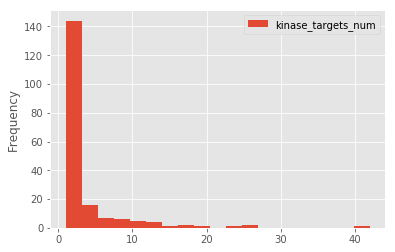

In [11]:
# Create histogram displaying the distribution of the number
#targets per kinase
kin.plot.hist(by = 'kinase_targets_num', bins = 19)

#Show histogram
plt.show()

# Creation of Final .GMT File

## Create Dictionary pf Tab-Separated Rows of the Dataframe

In [12]:
#Reset index of the dataframe
kin.reset_index(inplace = True)

#create column 'target_symbol_merged' in which all 'target_symbol' elements are joined by a \t symbol
kin['target_symbol_merged'] = ['\t'.join(x) for x in kin['target_symbol']]

#drop the now-unneccesary column 'target_symbol' and 'kinase_targets_num'
kin.drop('target_symbol', axis=1, inplace = True)
kin.drop('kinase_targets_num', axis=1, inplace = True)

#Create dictionary 'RegPhos' with index numbers as keys
RegPhos_num = dict([(key, '') for key in kin.index])

# loop through rows with iterrows()
for index, rowData in kin.iterrows():
    line = ('\t'.join(rowData))
    RegPhos_num[index] = line

## Write Info from Dictionary into a .GMT file

In [13]:
#Transfer tab-separated info into a new txt file
with open('RegPhosMouse.gmt', 'w') as openfile:
    for index in RegPhos_num:
        openfile.write(str(RegPhos_num[index]) + '\n')

## Test: Reading in the Newly-Created .GMT File

In [14]:
## Review formatting of the test, looks strange on this file but .gmt looks perfect